In [13]:
# ANN Building and Visualization Imports
import keras
from keras import backend as K
from keras import optimizers, losses
from keras.engine.topology import Layer
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import tensorflow as tf
from keras.callbacks import LambdaCallback
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.utils import shuffle




# Standard Imports
import pandas as pd
import numpy as np
import math

# Initializations
RF_size = 3
stride = 1

In [14]:
inputs = pd.read_csv('binary_shapes.csv')
inputs = inputs.drop('X1', axis = 0) # Taking out col names
inputs = inputs.apply(pd.to_numeric)  # converting to floats

inputs = inputs.values # convert to np ndarray
inputs = inputs.reshape(955, 50, 50, 1)
flattened_inputs = inputs.reshape(955, 2500)

In [15]:
labels = pd.read_csv('binary_shapes_labels.csv')
labels = labels.drop('x', axis = 0)
labels = labels.apply(pd.to_numeric)
labels = labels.values
labels = to_categorical(labels)

In [16]:
inputs, labels = shuffle(inputs, labels)

In [17]:
model = Sequential()
model.add(Conv2D(input_shape = (50,50,1), filters=52, kernel_size = RF_size, strides = stride, activation = 'relu'))
model.add(Flatten())
#model.add(Dense(96, activation = 'relu'))
model.add(Dense(39, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 48, 48, 52)        520       
_________________________________________________________________
flatten_13 (Flatten)         (None, 119808)            0         
_________________________________________________________________
dense_13 (Dense)             (None, 39)                4672551   
Total params: 4,673,071
Trainable params: 4,673,071
Non-trainable params: 0
_________________________________________________________________


In [18]:
def run_mod():
    model = Sequential()
    model.add(Conv2D(input_shape = (50,50,1), filters=52, kernel_size = RF_size, strides = stride, activation = 'relu'))
    model.add(Flatten())
    #model.add(Dense(96, activation = 'relu'))
    model.add(Dense(39, activation = 'softmax'))
    model.compile(optimizer = optimizers.adam(lr = 0.0005), loss = 'categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x = inputs, validation_split = 0.25, y = labels, batch_size = 50, epochs = 25)
    return(history)

In [19]:
val_acc5 = np.zeros(10)
val_acc25 = np.zeros(10)
val_loss5 = np.zeros(10)
val_loss25 = np.zeros(10)
for i in range(10):
        results = run_mod()
        val_acc5[i] = results.history['val_acc'][4]
        val_acc25[i] = results.history['val_acc'][24]
        val_loss5[i] = results.history['val_loss'][4]
        val_loss25[i] = results.history['val_loss'][24]
        
print("acc15 = " + str(np.mean(val_acc5)), "\n",
      "acc100 = " + str(np.mean(val_acc25)), "\n",
      "loss15 = " + str(np.mean(val_loss5)), "\n",
     "loss100 = " + str(np.mean(val_loss25)))

Train on 716 samples, validate on 239 samples
Epoch 1/25
716/716 [==============================] - 6s 8ms/step - loss: 3.4380 - acc: 0.3045 - val_loss: 1.6421 - val_acc: 0.6360
Epoch 2/25
716/716 [==============================] - 5s 6ms/step - loss: 1.0137 - acc: 0.7570 - val_loss: 0.8016 - val_acc: 0.8159
Epoch 3/25
716/716 [==============================] - 5s 6ms/step - loss: 0.4649 - acc: 0.8883 - val_loss: 0.7466 - val_acc: 0.8159
Epoch 4/25
716/716 [==============================] - 5s 6ms/step - loss: 0.2314 - acc: 0.9497 - val_loss: 0.6449 - val_acc: 0.8117
Epoch 5/25
716/716 [==============================] - 5s 6ms/step - loss: 0.1406 - acc: 0.9749 - val_loss: 0.5677 - val_acc: 0.8326
Epoch 6/25
716/716 [==============================] - 5s 7ms/step - loss: 0.0782 - acc: 0.9930 - val_loss: 0.5074 - val_acc: 0.8536
Epoch 7/25
716/716 [==============================] - 5s 7ms/step - loss: 0.0526 - acc: 1.0000 - val_loss: 0.5263 - val_acc: 0.8410
Epoch 8/25
716/716 [==========

Epoch 12/25
716/716 [==============================] - 5s 7ms/step - loss: 0.0118 - acc: 1.0000 - val_loss: 0.5616 - val_acc: 0.8577
Epoch 13/25
716/716 [==============================] - 5s 6ms/step - loss: 0.0134 - acc: 0.9986 - val_loss: 0.5053 - val_acc: 0.8619
Epoch 14/25
716/716 [==============================] - 5s 6ms/step - loss: 0.0082 - acc: 1.0000 - val_loss: 0.4983 - val_acc: 0.8619
Epoch 15/25
716/716 [==============================] - 5s 7ms/step - loss: 0.0071 - acc: 1.0000 - val_loss: 0.4992 - val_acc: 0.8661
Epoch 16/25
716/716 [==============================] - 5s 7ms/step - loss: 0.0056 - acc: 1.0000 - val_loss: 0.5050 - val_acc: 0.8661
Epoch 17/25
716/716 [==============================] - 5s 7ms/step - loss: 0.0052 - acc: 1.0000 - val_loss: 0.5118 - val_acc: 0.8619
Epoch 18/25
716/716 [==============================] - 5s 6ms/step - loss: 0.0044 - acc: 1.0000 - val_loss: 0.4954 - val_acc: 0.8703
Epoch 19/25
716/716 [==============================] - 5s 7ms/step - 

716/716 [==============================] - 5s 6ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.5229 - val_acc: 0.8661
Epoch 24/25
716/716 [==============================] - 5s 7ms/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.5270 - val_acc: 0.8661
Epoch 25/25
716/716 [==============================] - 5s 6ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.5210 - val_acc: 0.8661
Train on 716 samples, validate on 239 samples
Epoch 1/25
716/716 [==============================] - 6s 8ms/step - loss: 3.3171 - acc: 0.2989 - val_loss: 1.6426 - val_acc: 0.5732
Epoch 2/25
716/716 [==============================] - 5s 6ms/step - loss: 1.0634 - acc: 0.7542 - val_loss: 0.9919 - val_acc: 0.7531
Epoch 3/25
716/716 [==============================] - 5s 6ms/step - loss: 0.4808 - acc: 0.8841 - val_loss: 0.6340 - val_acc: 0.8410
Epoch 4/25
716/716 [==============================] - 5s 6ms/step - loss: 0.2462 - acc: 0.9469 - val_loss: 0.5660 - val_acc: 0.8452
Epoch 5/25
716/716 [===================

Epoch 9/25
716/716 [==============================] - 5s 6ms/step - loss: 0.0225 - acc: 0.9986 - val_loss: 0.5022 - val_acc: 0.8577
Epoch 10/25
716/716 [==============================] - 5s 6ms/step - loss: 0.0154 - acc: 1.0000 - val_loss: 0.4928 - val_acc: 0.8619
Epoch 11/25
716/716 [==============================] - 5s 6ms/step - loss: 0.0144 - acc: 1.0000 - val_loss: 0.5081 - val_acc: 0.8577
Epoch 12/25
716/716 [==============================] - 5s 6ms/step - loss: 0.0105 - acc: 1.0000 - val_loss: 0.5045 - val_acc: 0.8452
Epoch 13/25
716/716 [==============================] - 5s 7ms/step - loss: 0.0084 - acc: 1.0000 - val_loss: 0.5109 - val_acc: 0.8577
Epoch 14/25
716/716 [==============================] - 5s 6ms/step - loss: 0.0080 - acc: 1.0000 - val_loss: 0.5066 - val_acc: 0.8577
Epoch 15/25
716/716 [==============================] - 5s 6ms/step - loss: 0.0066 - acc: 1.0000 - val_loss: 0.5038 - val_acc: 0.8661
Epoch 16/25
716/716 [==============================] - 5s 6ms/step - l

716/716 [==============================] - 5s 6ms/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.5079 - val_acc: 0.8619
Epoch 21/25
716/716 [==============================] - 5s 7ms/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.5173 - val_acc: 0.8619
Epoch 22/25
716/716 [==============================] - 5s 6ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.5178 - val_acc: 0.8619
Epoch 23/25
716/716 [==============================] - 5s 7ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.5165 - val_acc: 0.8661
Epoch 24/25
716/716 [==============================] - 5s 6ms/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.5126 - val_acc: 0.8619
Epoch 25/25
716/716 [==============================] - 5s 6ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.5208 - val_acc: 0.8661
acc15 = 0.8238493707888296 
 acc100 = 0.8635983255119004 
 loss15 = 0.5885942238893469 
 loss100 = 0.5157839598017258


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


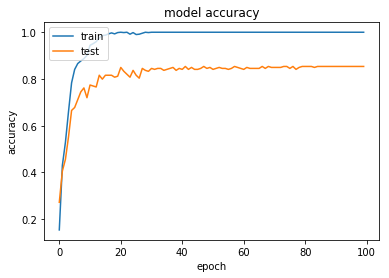

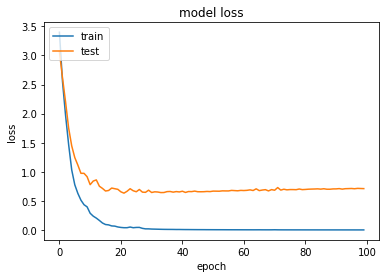

In [65]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Notes
* make sure image set MI caluclations for binary shapes datasets are right it’s doing it for all 955 with 2*2 clusters 
* for 8x8 the filter you have to learn is more complex but eventually it’s more efficient, maybe that’s why loss is less for 2x2 at 15 epochs
* Also more paramters to tune with larger RF size, but same LR and same # of epochs



In [63]:
model = Sequential()
model.add(Conv2D(input_shape = (50,50,1), filters=52, kernel_size = RF_size, strides = stride, activation = 'relu'))
model.add(Flatten())
model.add(Dense(96, activation = 'relu'))
model.add(Dense(39, activation = 'softmax'))
model.compile(optimizer = optimizers.adam(lr = 0.0005), loss = 'categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x = inputs, validation_split = 0.25, y = labels, batch_size = 50, epochs = 100)


Train on 716 samples, validate on 239 samples
Epoch 1/100
716/716 [==============================] - 5s 7ms/step - loss: 3.3994 - acc: 0.1536 - val_loss: 3.0667 - val_acc: 0.2720
Epoch 2/100
716/716 [==============================] - 2s 3ms/step - loss: 2.5525 - acc: 0.4302 - val_loss: 2.6166 - val_acc: 0.4059
Epoch 3/100
716/716 [==============================] - 2s 3ms/step - loss: 1.9698 - acc: 0.5293 - val_loss: 2.2005 - val_acc: 0.4561
Epoch 4/100
716/716 [==============================] - 2s 3ms/step - loss: 1.4676 - acc: 0.6606 - val_loss: 1.7521 - val_acc: 0.5523
Epoch 5/100
716/716 [==============================] - 2s 3ms/step - loss: 1.0326 - acc: 0.7835 - val_loss: 1.4461 - val_acc: 0.6653
Epoch 6/100
716/716 [==============================] - 2s 3ms/step - loss: 0.7769 - acc: 0.8408 - val_loss: 1.2441 - val_acc: 0.6778
Epoch 7/100
716/716 [==============================] - 2s 3ms/step - loss: 0.6285 - acc: 0.8659 - val_loss: 1.1151 - val_acc: 0.7113
Epoch 8/100
716/716 [==

Epoch 62/100
716/716 [==============================] - 2s 2ms/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.6816 - val_acc: 0.8494
Epoch 63/100
716/716 [==============================] - 2s 3ms/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.6897 - val_acc: 0.8452
Epoch 64/100
716/716 [==============================] - 2s 3ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.6787 - val_acc: 0.8452
Epoch 65/100
716/716 [==============================] - 2s 3ms/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.7076 - val_acc: 0.8452
Epoch 66/100
716/716 [==============================] - 2s 3ms/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.6768 - val_acc: 0.8452
Epoch 67/100
716/716 [==============================] - 2s 3ms/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.6867 - val_acc: 0.8536
Epoch 68/100
716/716 [==============================] - 2s 2ms/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.6932 - val_acc: 0.8452
Epoch 69/100
716/716 [==============================] - 2s 2ms